In [28]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
%matplotlib inline

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
stations_features = pd.read_csv('clean_data/stations_features.csv')
emptyCount = pd.read_csv('clean_data/emptyCount.csv')

In [30]:
stations_features.head()

,capacity,lat,lon,name,short_name,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
2,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
3,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
4,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [31]:
stations_features.drop(['capacity', 'lat', 'lon', 'name', 'short_name'], axis=1, inplace=True)

In [32]:
stations_features.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,301,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
1,445,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
2,487,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
3,504,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
4,72,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [33]:
stations_features.shape

(818, 49)

In [34]:
emptyCount.head()

,capacity,lat,lon,name,short_name,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0
1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0
2,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0
3,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0
4,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0


In [35]:
emptyCount.drop(['lat', 'lon', 'name', 'short_name'], axis=1, inplace=True)

In [36]:
emptyCount.shape

(818, 26)

In [37]:
station = emptyCount.merge(stations_features, on = 'station_id')

In [38]:
station.head()

,capacity,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,37,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
1,52,445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
2,34,487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
3,44,504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
4,39,72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [39]:
station.shape

(818, 74)

In [15]:
#station.drop(['lat_x', 'lon_x', 'name', 'short_name_x', 'lat_y', 'lon_y', 'short_name_y'], axis=1, inplace=True)

In [40]:
#station.head()

In [42]:
#station.shape

In [43]:
station.head()

,capacity,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,37,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
1,52,445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
2,34,487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
3,44,504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
4,39,72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [44]:
station = station.fillna(0)

In [45]:
stations_capacity = station.set_index('station_id')
#stations_capacity.head()
stations_capacity = stations_capacity.astype('float')
stations_capacity.head()

,capacity,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
445,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
487,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
504,44.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
72,39.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [46]:
stations_nocapacity = stations_capacity.drop(['capacity'], axis=1, inplace=False)
stations_nocapacity = stations_nocapacity.astype('float')
stations_nocapacity.head()

,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [47]:
#stations_capacity
stations_ratio = stations_capacity.apply(lambda x: x/stations_capacity['capacity'], axis=0)
stations_ratio = stations_ratio.drop(['capacity'], axis=1, inplace=False)
stations_ratio.head()

,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.243243,1.054054,1.297297,0.891892,0.945946,1.054054,0.702703,0.486486,0.405405,0.054054,0.000000,0.135135,10.378378,22.108108,6.297297,11.162162,3.486486,4.837838,2.486486,2.513514,2.135135,1.864865,8.135135,1.837838,31.756757,7.756757,78.621622,19.432432,148.837838,31.459459,57.243243,25.648649,46.594595,32.081081,51.972973,41.972973,55.135135,48.891892,57.918919,54.081081,55.918919,59.162162,57.054054,69.972973,62.135135,83.081081,69.216216,132.675676,81.594595,157.216216,70.783784,127.972973,50.675676,104.351351,35.972973,74.675676,27.513514,60.216216,18.945946,38.594595
445,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923,0.269231,0.365385,0.326923,0.153846,0.423077,0.288462,0.096154,0.173077,0.038462,0.000000,0.000000,9.634615,25.134615,7.442308,13.173077,4.576923,6.884615,2.480769,4.826923,2.980769,2.173077,7.326923,2.326923,25.807692,8.173077,82.019231,21.153846,200.365385,36.038462,117.711538,27.538462,78.250000,33.807692,62.730769,36.730769,68.634615,45.461538,60.576923,53.980769,53.942308,58.269231,55.480769,64.653846,56.557692,82.730769,67.903846,131.846154,95.461538,183.365385,75.326923,199.192308,43.307692,152.884615,28.442308,92.326923,22.384615,64.250000,21.250000,43.980769
487,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.147059,0.823529,1.029412,1.147059,0.794118,0.911765,0.352941,0.352941,0.088235,0.029412,0.000000,0.029412,7.058824,23.205882,3.323529,9.941176,1.647059,5.823529,1.058824,4.470588,7.088235,2.941176,21.676471,3.941176,84.470588,19.970588,153.147059,31.558824,221.764706,48.147059,142.235294,32.941176,69.676471,32.235294,65.029412,50.970588,63.029412,58.470588,65.764706,68.647059,68.029412,81.823529,80.794118,90.764706,83.176471,115.382353,109.088235,211.205882,106.176471,164.235294,82.911765,112.029412,54.970588,102.735294,37.352941,85.764706,27.382353,67.294118,15.029412,41.264706
504,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363636,0.840909,1.000000,0.772727,0.681818,0.545455,0.477273,0.295455,0.295455,0.090909,0.000000,0.045455,25.022727,27.659091,12.704545,15.181818,7.318182,10.931818,5.000000,6.795455,4.977273,4.409091,21.681818,7.159091,73.227273,35.045455,120.227273,57.136364,137.295455,60.977273,68.863636,52.000000,58.863636,50.204545,65.840909,55.363636,73.681818,71.977273,73.886364,76.000000,76.181818,80.227273,86.318182,93.409091,94.090909,103.386364,108.909091,169.840909,108.568182,182.954545,97.886364,135.522727,74.181818,93.545455,52.659091,68.181818,48.750000,62.477273,37.863636,40.454545
72,0.128205,0.051282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.282051,0.307692,0.128205,0.076923,0.256410,0.333333,0.358974,0.153846,0.384615,0.487179,0.384615,0.128205,8.589744,8.948718,6.153846,4.589744,4.230769,2.000000,2.153846,1.564103,3.000000,0.615385,7.000000,1.692308,13.076923,18.512821,43.948718,29.000000,86.743590,52.179487,76.128205,79.000000,49.179487,58

In [48]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    #print(KM)
    
#     KM = []
#     for k in K:
#         KM.append(KMeans(n_clusters=k).fit(data))
#         print(k)
    
    #print(KM)
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]


    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]

    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def silhouette_score_plot(data,range_n_clusters):
    X=data
    silhouette_score_max = 0
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(8, 8)

        #The 1st subplot is the silhouette plot
        #The silhouette coefficient can range from -1, 1 but in this example all
        #lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        #The (n_clusters+1)*10 is for inserting blank space between silhouette
        #plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        
        if silhouette_avg > silhouette_score_max:
            silhouette_score_max = silhouette_avg
            K = n_clusters
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
             # Aggregate the silhouette scores for samples belonging to
             # cluster i, and sort them
            ith_cluster_silhouette_values = \
                 sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_silhouette_values,
                               facecolor=color, edgecolor=color, alpha=0.7)

             # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

             # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

         # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.show()
    
    print("Max silhouette_score:", silhouette_score_max, "when K =", K)
    #return(K)

In [50]:
# stations_capacity = stations_capacity.fillna(0)
# stations_ratio = stations_ratio.fillna(0)

In [51]:
min_max_scaler_1 = MinMaxScaler()
df_scaled_1 = pd.DataFrame(min_max_scaler_1.fit_transform(stations_capacity), columns=stations_capacity.columns, index=stations_capacity.index)

In [52]:
#df_scaled_1

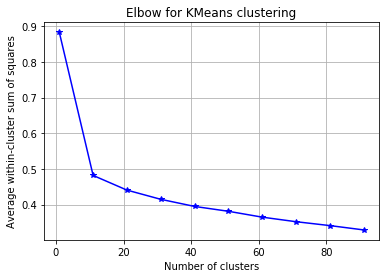

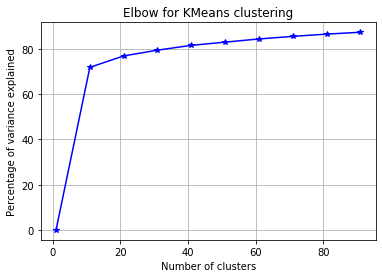

In [53]:
elbow(df_scaled_1, range(1,100,10))

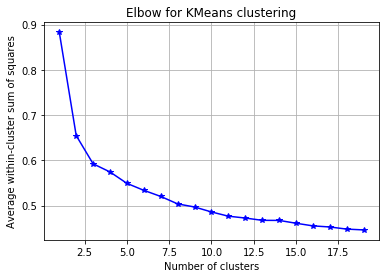

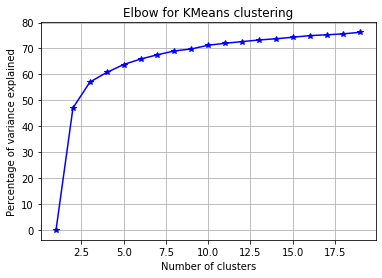

In [54]:
elbow(df_scaled_1, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.4935476595387335


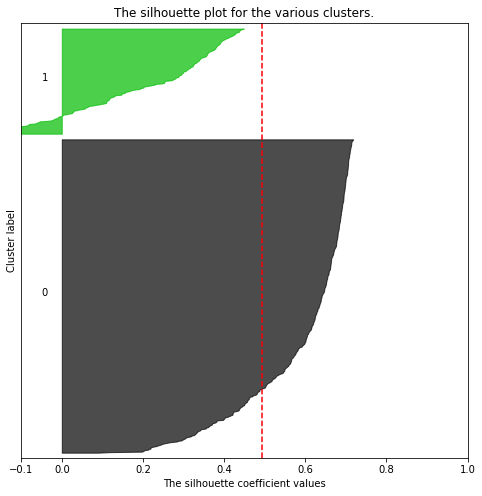

For n_clusters = 3 The average silhouette_score is : 0.34250665866727614


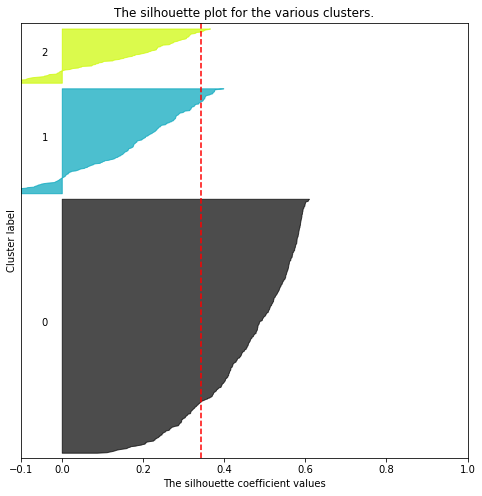

For n_clusters = 4 The average silhouette_score is : 0.34205502176184416


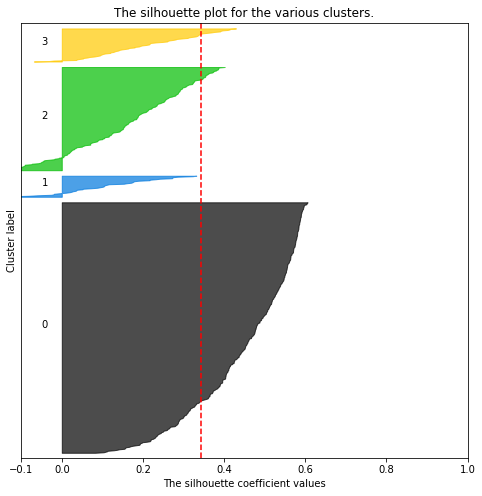

For n_clusters = 5 The average silhouette_score is : 0.20546749934229694


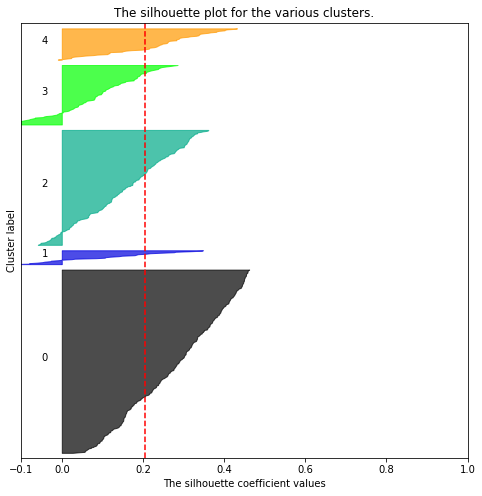

For n_clusters = 6 The average silhouette_score is : 0.19617515254323029


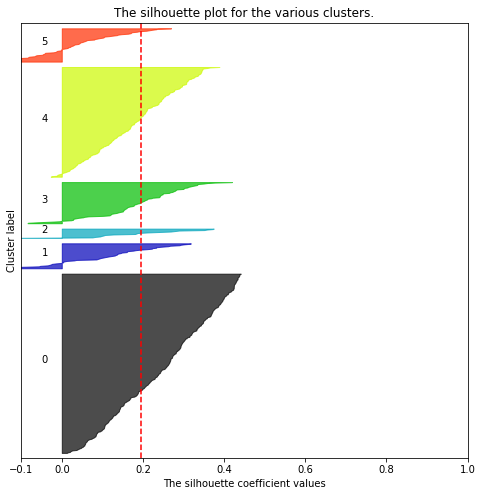

For n_clusters = 7 The average silhouette_score is : 0.1807399165708514


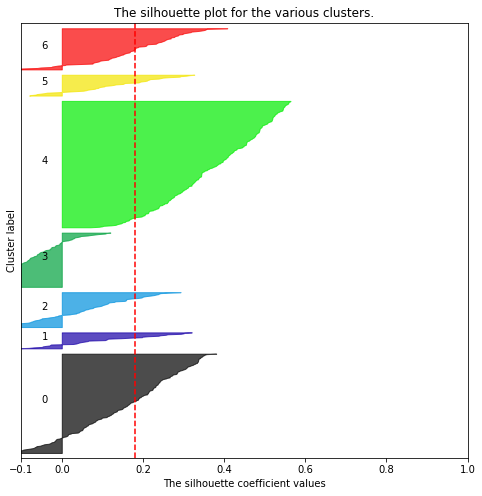

For n_clusters = 8 The average silhouette_score is : 0.17644061196653016


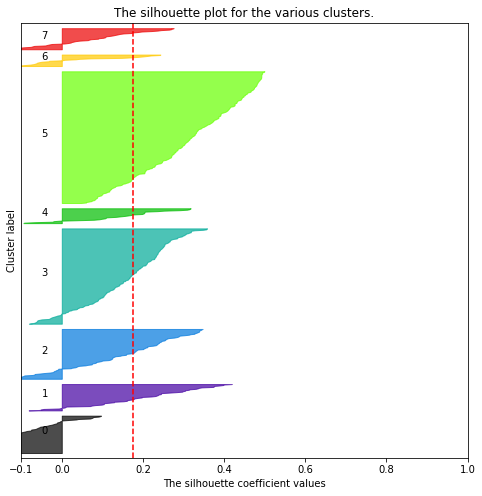

For n_clusters = 9 The average silhouette_score is : 0.14173993236000035


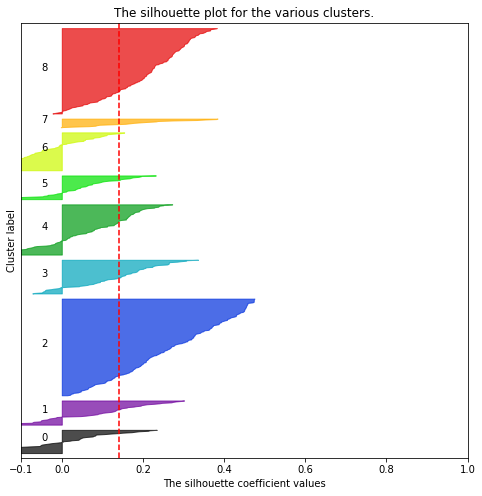

Max silhouette_score: 0.4935476595387335 when K = 2


In [55]:
K = silhouette_score_plot(df_scaled_1, range(2,10))

In [56]:
stations_ratio = stations_ratio.replace([np.inf, -np.inf], np.nan)

In [57]:
stations_ratio = stations_ratio.dropna()

In [58]:
min_max_scaler_3 = MinMaxScaler()
df_scaled_3 = pd.DataFrame(min_max_scaler_3.fit_transform(stations_ratio), columns=stations_ratio.columns, index=stations_ratio.index)

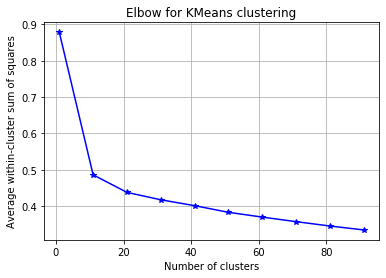

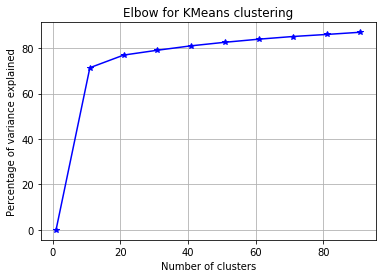

In [59]:
elbow(df_scaled_3, range(1,100,10))

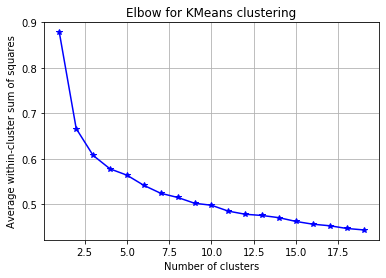

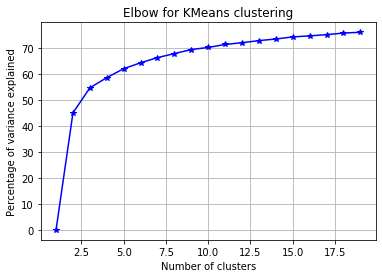

In [60]:
elbow(df_scaled_3, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.4655736278284288


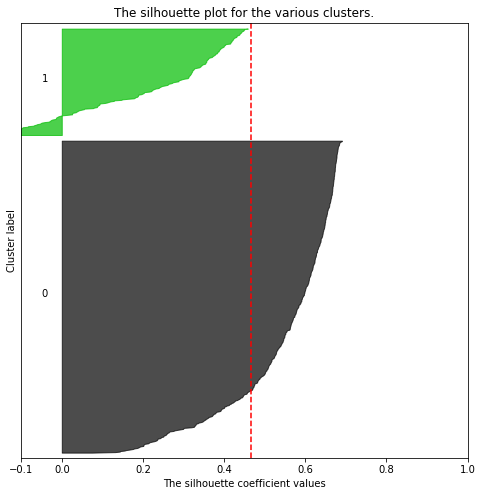

For n_clusters = 3 The average silhouette_score is : 0.3000996390554855


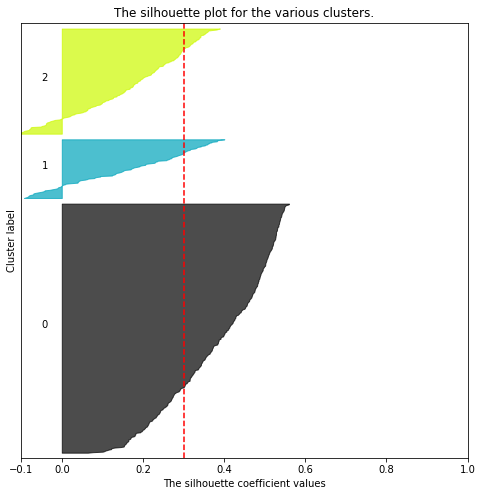

For n_clusters = 4 The average silhouette_score is : 0.20341591338374884


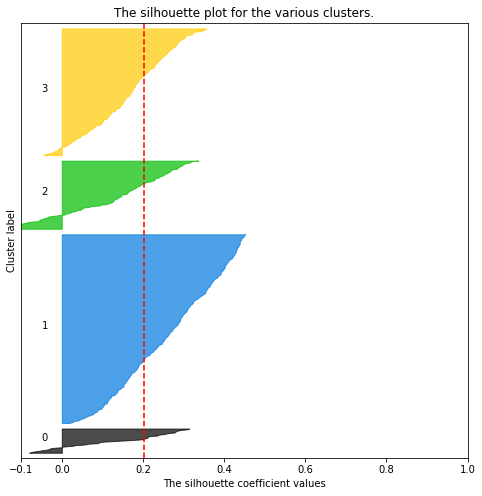

For n_clusters = 5 The average silhouette_score is : 0.21278673355514957


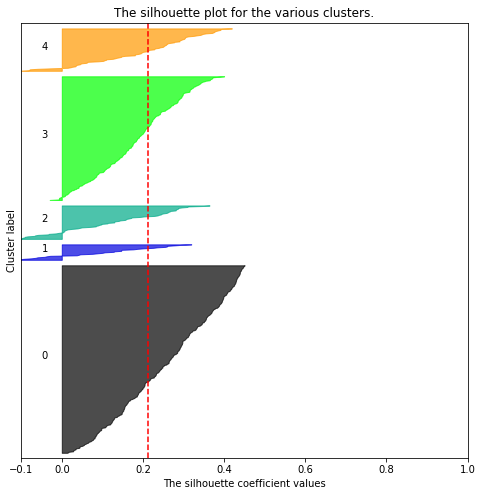

For n_clusters = 6 The average silhouette_score is : 0.15707833732648732


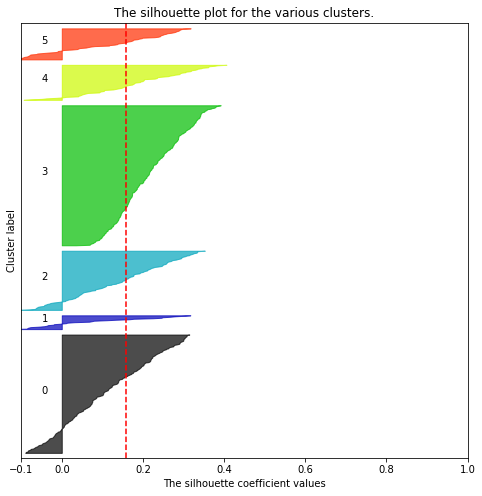

For n_clusters = 7 The average silhouette_score is : 0.16225747233618182


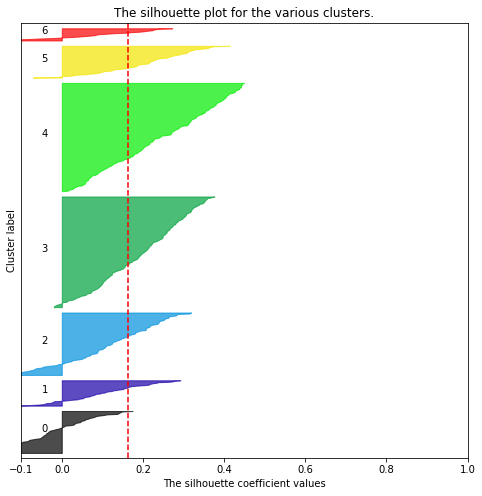

For n_clusters = 8 The average silhouette_score is : 0.1652548247022555


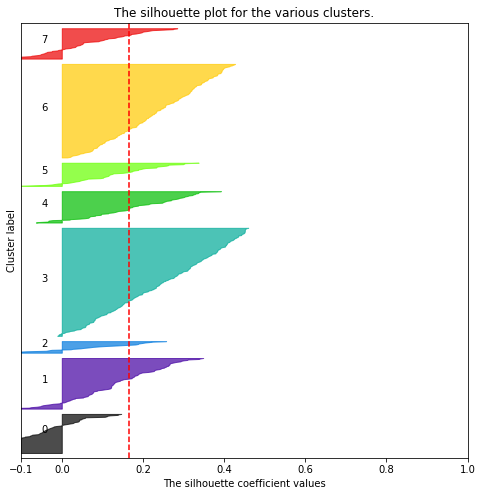

For n_clusters = 9 The average silhouette_score is : 0.15739233404341293


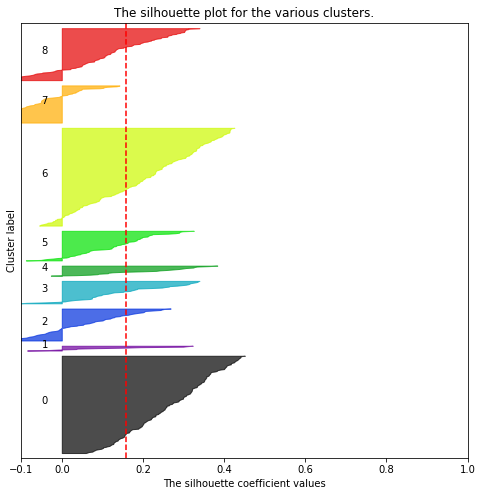

For n_clusters = 10 The average silhouette_score is : 0.16797146265433258


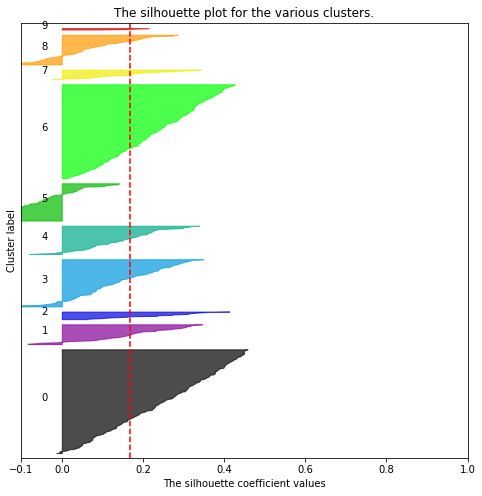

For n_clusters = 11 The average silhouette_score is : 0.11678182786662221


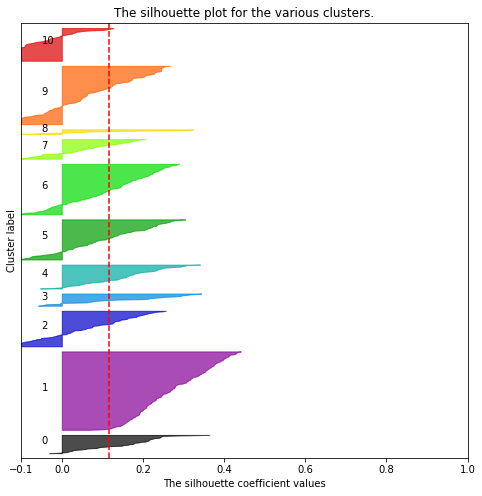

For n_clusters = 12 The average silhouette_score is : 0.11999069452283505


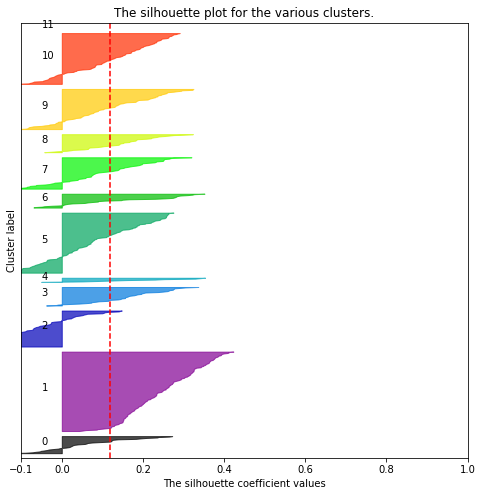

For n_clusters = 13 The average silhouette_score is : 0.1298230160147418


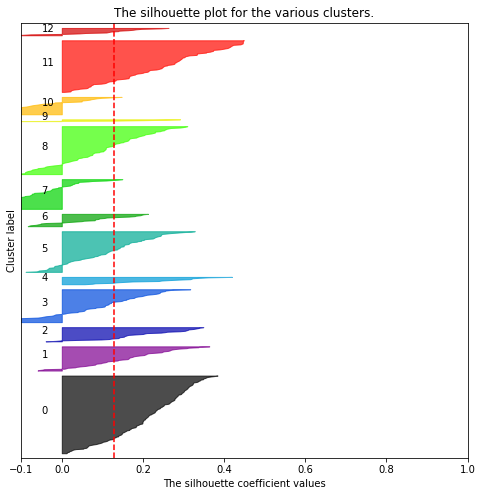

For n_clusters = 14 The average silhouette_score is : 0.14249467727683535


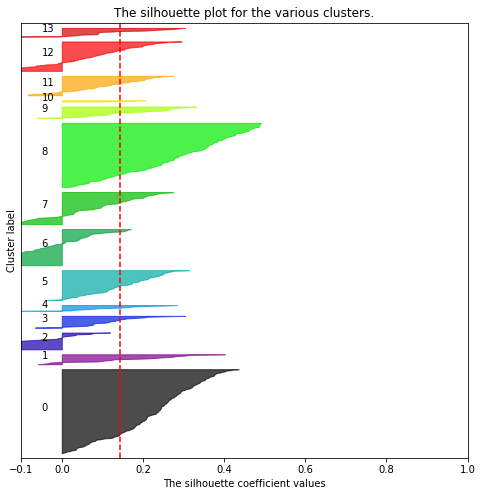

For n_clusters = 15 The average silhouette_score is : 0.11827609205713552


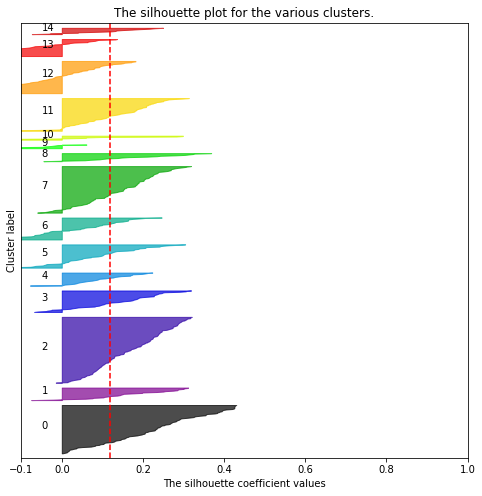

For n_clusters = 16 The average silhouette_score is : 0.12292208124266167


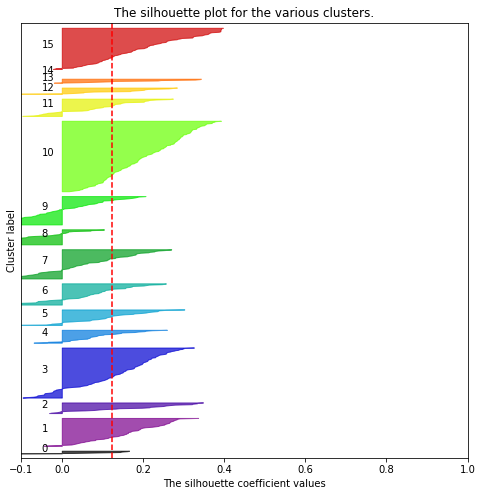

For n_clusters = 17 The average silhouette_score is : 0.11643487470204866


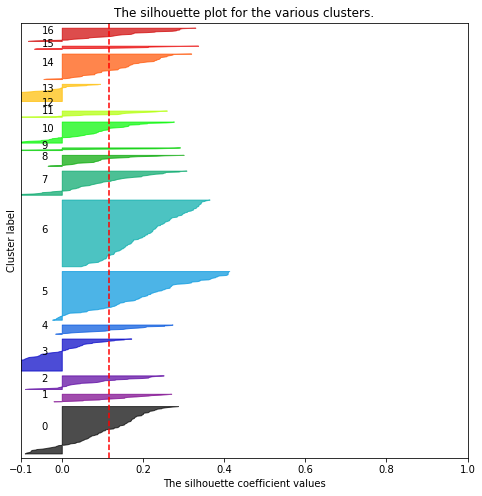

For n_clusters = 18 The average silhouette_score is : 0.12248373199119426


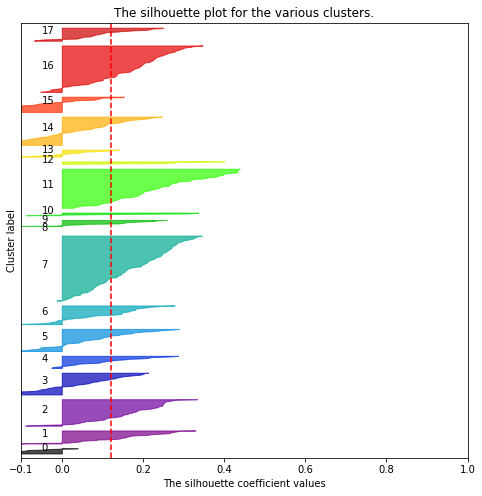

For n_clusters = 19 The average silhouette_score is : 0.1171725350767196


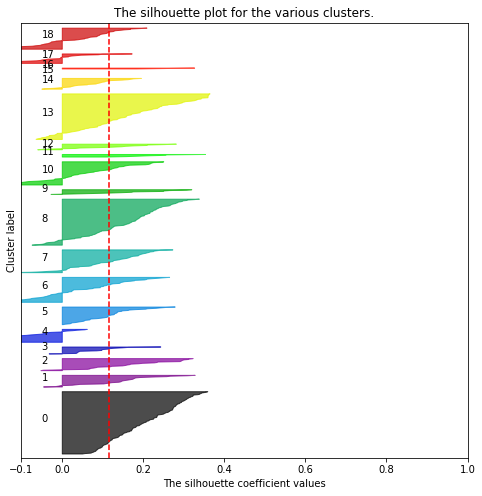

Max silhouette_score: 0.4655736278284288 when K = 2


In [61]:
K = silhouette_score_plot(df_scaled_3, range(2,20))

In [62]:
min_max_scaler_2 = MinMaxScaler()
df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)

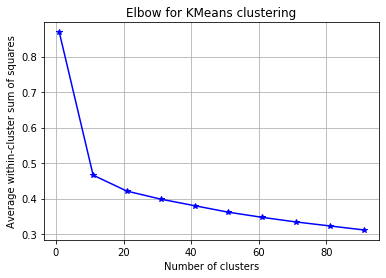

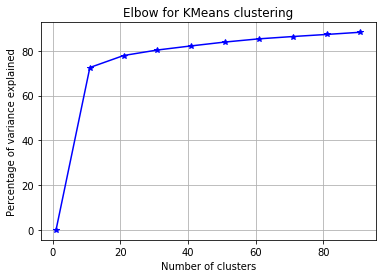

In [63]:
elbow(df_scaled_2, range(1,100,10))

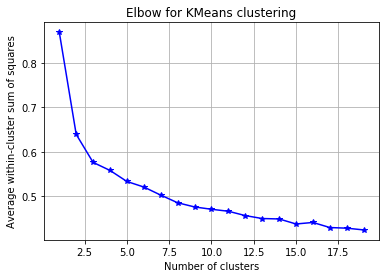

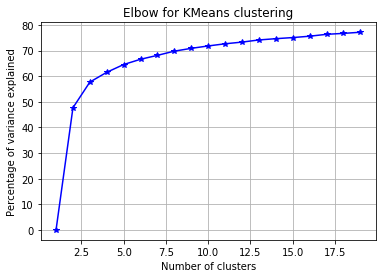

In [64]:
elbow(df_scaled_2, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.5017633132676751


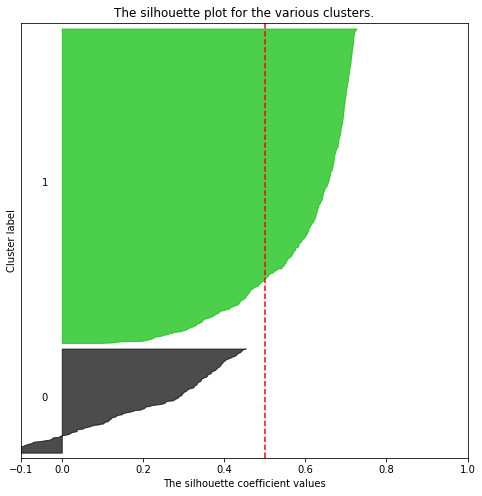

For n_clusters = 3 The average silhouette_score is : 0.35003502442536955


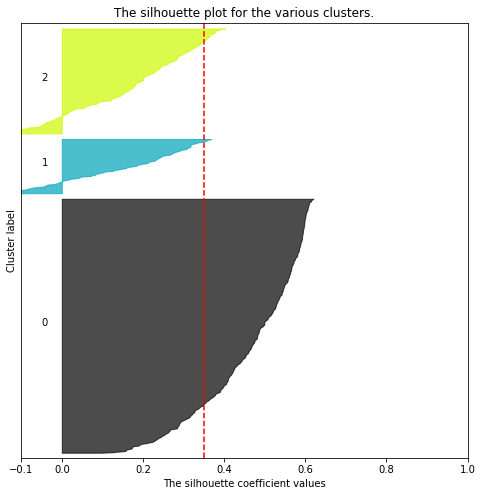

For n_clusters = 4 The average silhouette_score is : 0.352658917293351


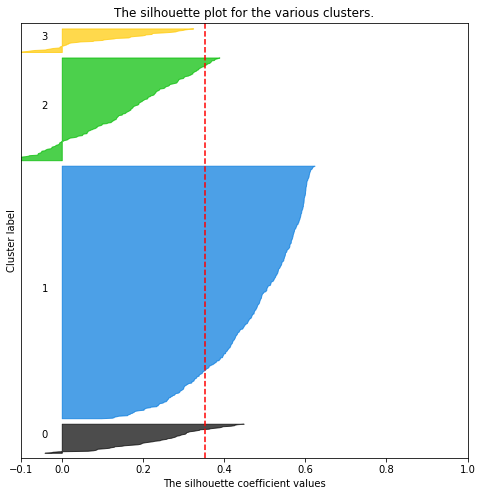

For n_clusters = 5 The average silhouette_score is : 0.22110664608541064


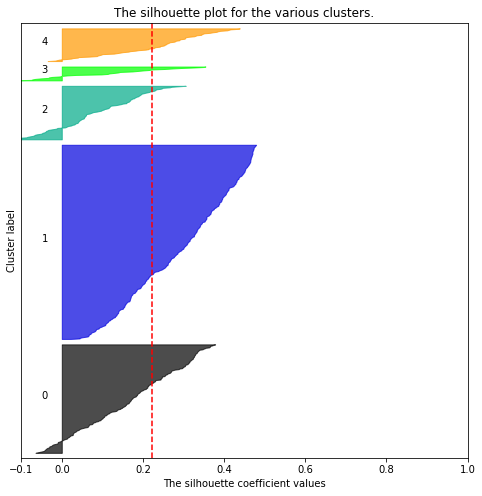

For n_clusters = 6 The average silhouette_score is : 0.19209713756947924


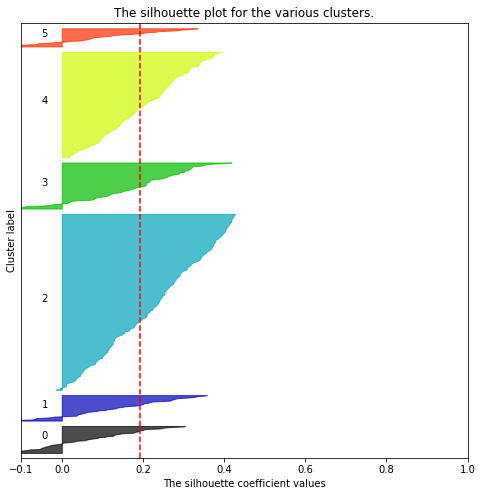

For n_clusters = 7 The average silhouette_score is : 0.16247348421452956


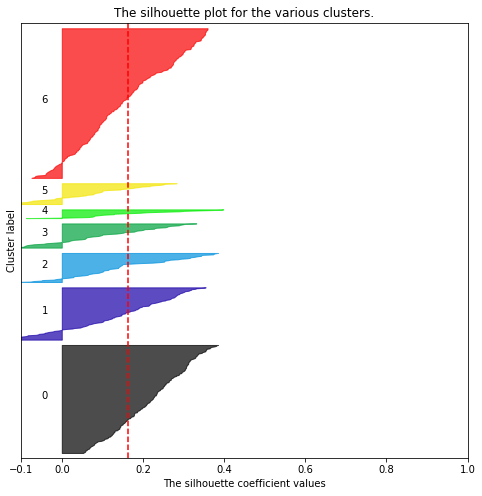

For n_clusters = 8 The average silhouette_score is : 0.16931217411939853


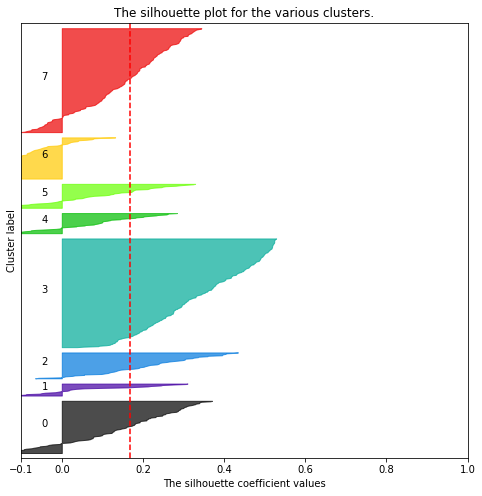

For n_clusters = 9 The average silhouette_score is : 0.17056789623015198


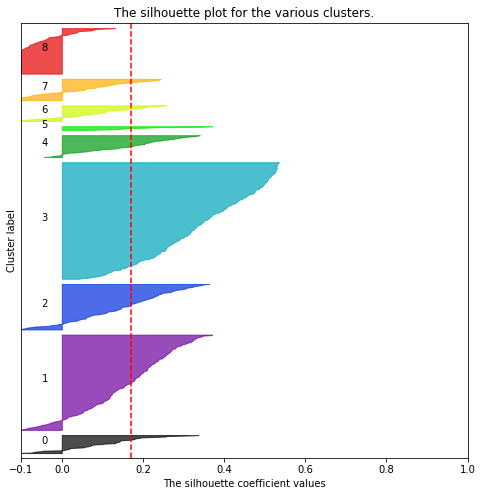

Max silhouette_score: 0.5017633132676751 when K = 2


In [65]:
K = silhouette_score_plot(df_scaled_2, range(2,10))

6 types

In [66]:
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)

In [67]:
clusterer = KMeans(n_clusters=6, random_state=324)
cluster_labels = clusterer.fit_predict(df_scaled)

In [68]:
stations_nocapacity.head()

,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0
504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0
72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0


In [69]:
stations_nocapacity['label'] = cluster_labels

In [70]:
stations_nocapacity.head()

,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0,384.0,818.0,233.0,413.0,129.0,179.0,92.0,93.0,79.0,69.0,301.0,68.0,1175.0,287.0,2909.0,719.0,5507.0,1164.0,2118.0,949.0,1724.0,1187.0,1923.0,1553.0,2040.0,1809.0,2143.0,2001.0,2069.0,2189.0,2111.0,2589.0,2299.0,3074.0,2561.0,4909.0,3019.0,5817.0,2619.0,4735.0,1875.0,3861.0,1331.0,2763.0,1018.0,2228.0,701.0,1428.0,3
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0,501.0,1307.0,387.0,685.0,238.0,358.0,129.0,251.0,155.0,113.0,381.0,121.0,1342.0,425.0,4265.0,1100.0,10419.0,1874.0,6121.0,1432.0,4069.0,1758.0,3262.0,1910.0,3569.0,2364.0,3150.0,2807.0,2805.0,3030.0,2885.0,3362.0,2941.0,4302.0,3531.0,6856.0,4964.0,9535.0,3917.0,10358.0,2252.0,7950.0,1479.0,4801.0,1164.0,3341.0,1105.0,2287.0,1
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0,240.0,789.0,113.0,338.0,56.0,198.0,36.0,152.0,241.0,100.0,737.0,134.0,2872.0,679.0,5207.0,1073.0,7540.0,1637.0,4836.0,1120.0,2369.0,1096.0,2211.0,1733.0,2143.0,1988.0,2236.0,2334.0,2313.0,2782.0,2747.0,3086.0,2828.0,3923.0,3709.0,7181.0,3610.0,5584.0,2819.0,3809.0,1869.0,3493.0,1270.0,2916.0,931.0,2288.0,511.0,1403.0,3
504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0,1101.0,1217.0,559.0,668.0,322.0,481.0,220.0,299.0,219.0,194.0,954.0,315.0,3222.0,1542.0,5290.0,2514.0,6041.0,2683.0,3030.0,2288.0,2590.0,2209.0,2897.0,2436.0,3242.0,3167.0,3251.0,3344.0,3352.0,3530.0,3798.0,4110.0,4140.0,4549.0,4792.0,7473.0,4777.0,8050.0,4307.0,5963.0,3264.0,4116.0,2317.0,3000.0,2145.0,2749.0,1666.0,1780.0,1
72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0,335.0,349.0,240.0,179.0,165.0,78.0,84.0,61.0,117.0,24.0,273.0,66.0,510.0,722.0,1714.0,1131.0,3383.0,2035.0,2969.0,3081.0,1918.0,2272.0,1807.0,1762.0,2118.0,1881.0,2218.0,2038.0,2144.0,2206.0,2281.0,2436.0,2762.0,2935.0,3467.0,3383.0,3496.0,3853.0,2588.0,2950.0,1535.0,1922.0,916.0,1351.0,800.0,1224.0,565.0,653.0,3


In [71]:
stations_nocapacity = stations_nocapacity.reset_index()

In [72]:
stations_nocapacity.to_csv('Clean_Data/stations_class_all.csv', index=False)

In [73]:
station = pd.read_csv('clean_data/citibike_station.csv')

In [74]:
station_cluster = stations_nocapacity.merge(station)

In [75]:
station_cluster.to_csv('Clean_Data/station_label.csv', index=False)